## 1. Creating Embeddings

In [1]:
import csv
import json
import numpy as np
import seaborn as sns
from scipy import spatial
from sklearn.preprocessing import StandardScaler
from sentence_transformers import SentenceTransformer

# Read classmates and their responses from a CSV file, replace classmates.csv with own link or file name
attendees_map = {}
with open('classmates.csv', newline='') as csvfile:
    classmates = csv.reader(csvfile, delimiter=',', quotechar='"')
    next(classmates)  # Skip the header row
    for row in classmates:
        name, paragraph = row
        attendees_map[paragraph] = name
        
# Generate sentence embeddings
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
paragraphs = list(attendees_map.keys())
embeddings = model.encode(paragraphs)
    
# Create a dictionary to store embeddings for each person
person_embeddings = {attendees_map[paragraph]: embedding for paragraph, embedding in zip(paragraphs, embeddings)}

# Save dictionary to file
person_embeddings = {key: value.tolist() for key, value in person_embeddings.items()} # Convert numpy arrays to lists

with open("embeddings.json", "w") as f:
    json.dump(person_embeddings, f)

/Users/greg/Documents/code/embeddingicebreaker/.venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/greg/Documents/code/embeddingicebreaker/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 2. Creating Visualization

In [2]:
# Reducing dimensionality of embedding data, scaling to coordinate domain/range
import umap

reducer = umap.UMAP(random_state=42) # set the seed to 42
scaler = StandardScaler()
scaled_data = scaler.fit_transform(list(person_embeddings.values()))
reduced_data = reducer.fit_transform(scaled_data)

/Users/greg/Documents/code/embeddingicebreaker/.venv/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/greg/Documents/code/embeddingicebreaker/.venv/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/greg/Documents/code/embedding

In [38]:
from scipy.spatial.distance import cosine, euclidean
from scipy.stats import spearmanr, kendalltau

myKey = "Priya Singh" # using Priya Singh from the GPT generated data for this exercise

# Compute cosine similarity and return list of names sorted by it
def cosine_names():

    myVal = person_embeddings[myKey]

    similarity = []
    for key, value in person_embeddings.items():
        thisSimilarity = 1 - cosine(value, myVal)
        similarity.append((key, thisSimilarity))

    similarity.sort(key=lambda x: x[1], reverse=True)
    names = [x[0] for x in similarity]

    return names

# Compute distances in visualization and return names sorted by it
def distance_names():
    
    keys = list(person_embeddings.keys())
    myCoords = reduced_data[keys.index(myKey)]

    distances = [euclidean(myCoords, p) for p in reduced_data]
    
    pairs = list(zip(keys, distances))
    pairs.sort(key=lambda x: x[1])
    names = [x[0] for x in pairs]

    return names

# Compute rank correlation
names1 = cosine_names()
names2 = distance_names()

rank1 = list(range(1, len(names1)+1))
rank2 = []
for i in range(len(rank1)):
    rank2.append(names2.index(names1[i])+1)

spearman_corr, spearman_p = spearmanr(rank1, rank2)
print(f"Spearman's rank correlation: {spearman_corr:.3f} (p-value: {spearman_p:.3f})")

Spearman's rank correlation: 0.614 (p-value: 0.004)


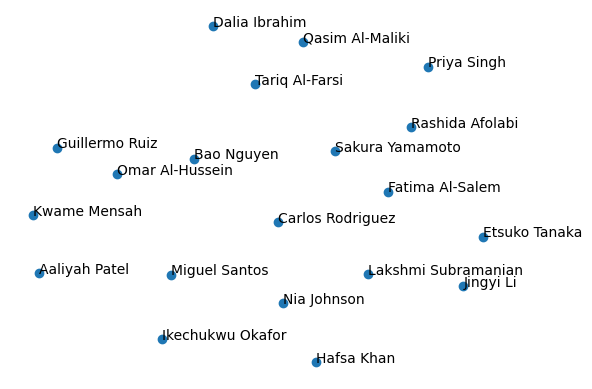

In [3]:
import matplotlib.pyplot as plt

# Creating lists of coordinates with accompanying labels
x = [row[0] for row in reduced_data]
y = [row[1] for row in reduced_data]
label = list(person_embeddings.keys())

# Plotting and annotating data points
plt.scatter(x,y)
for i, name in enumerate(label):
    plt.annotate(name, (x[i], y[i]), fontsize="10")

# Clean-up and Export
plt.axis('off')
plt.savefig('visualization.png', dpi=800)


## 3. [BONUS] Providing top matches

In [4]:
from collections import defaultdict

In [5]:
top_matches = {}
all_personal_pairs = defaultdict(list)
for person in attendees_map.values():
    for person1 in attendees_map.values():
        all_personal_pairs[person].append([spatial.distance.cosine(person_embeddings[person1], person_embeddings[person]), person1])

for person in attendees_map.values():
    top_matches[person] = sorted(all_personal_pairs[person], key=lambda x: x[0])

print(top_matches)


{'Aaliyah Patel': [[0, 'Aaliyah Patel'], [0.5672373713402337, 'Kwame Mensah'], [0.708439911116006, 'Guillermo Ruiz'], [0.727201088562308, 'Carlos Rodriguez'], [0.7395498282946303, 'Qasim Al-Maliki'], [0.7760088295898687, 'Ikechukwu Okafor'], [0.8057684017092718, 'Bao Nguyen'], [0.8194445424598251, 'Hafsa Khan'], [0.8326146454730058, 'Dalia Ibrahim'], [0.8413415106748103, 'Lakshmi Subramanian'], [0.8444181073715983, 'Miguel Santos'], [0.852658656956724, 'Omar Al-Hussein'], [0.8600731600583584, 'Priya Singh'], [0.882059836131701, 'Fatima Al-Salem'], [0.8969501738340095, 'Nia Johnson'], [0.9356908245303076, 'Etsuko Tanaka'], [0.9446181027293437, 'Sakura Yamamoto'], [0.9620888190108263, 'Tariq Al-Farsi'], [0.9717902389006675, 'Jingyi Li'], [0.9828171846433728, 'Rashida Afolabi']], 'Bao Nguyen': [[0, 'Bao Nguyen'], [0.6620322793565447, 'Guillermo Ruiz'], [0.6832200181341426, 'Omar Al-Hussein'], [0.7100531554649215, 'Kwame Mensah'], [0.7359562247682364, 'Qasim Al-Maliki'], [0.803983143369297